解决普通优化问题

In [1]:
import numpy as np


def schaffer(p):
    '''
    函数具有多个局部最小值，并且在 (0,0) 处有全局最小值为 0
    '''
    x1, x2 = p
    x = np.square(x1) + np.square(x2)
    return 0.5 + (np.square(np.sin(x)) - 0.5) / np.square(1 + 0.001 * x)

In [2]:
from sko.GA import GA
# 在多维优化时，想让哪个变量限制为整数，就设定 precision 为 整数 即可
ga = GA(func=schaffer, n_dim=2, size_pop=50, max_iter=800, prob_mut=0.001, lb=[-1, -1], ub=[1, 1], precision=1e-7)
best_x, best_y = ga.run()
print('best_x:', best_x, '\n', 'best_y:', best_y)

best_x: [1.49011616e-07 2.98023233e-08] 
 best_y: [0.]


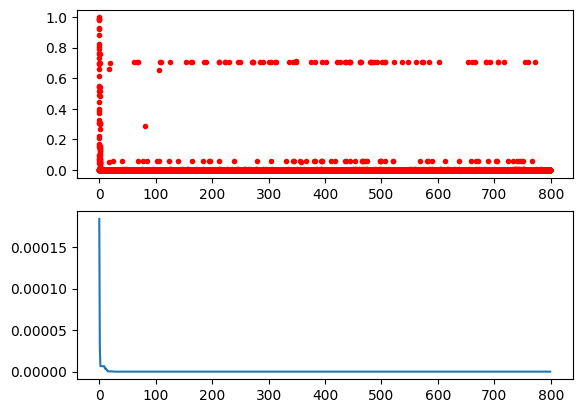

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Y_history = pd.DataFrame(ga.all_history_Y)
fig, ax = plt.subplots(2, 1)
# 绘制每个个体的适应度值
ax[0].plot(Y_history.index, Y_history.values, '.', color='red')
# 绘制历史最佳适应度值
Y_history.min(axis=1).cummin().plot(kind='line')
plt.show()

##### 遗传算法用于旅行商

GA_TSP 针对TSP问题重载了 交叉(crossover)、变异(mutation) 两个算子

In [4]:
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt

num_points = 50

points_coordinate = np.random.rand(num_points, 2)  # generate coordinate of points
distance_matrix = spatial.distance.cdist(points_coordinate, points_coordinate, metric='euclidean')


# 定义目标函数
def cal_total_distance(routine):
    '''The objective function. input routine, return total distance.
    cal_total_distance(np.arange(num_points))
    '''
    num_points, = routine.shape
    return sum([distance_matrix[routine[i % num_points], routine[(i + 1) % num_points]] for i in range(num_points)])

In [5]:
from sko.GA import GA_TSP

ga_tsp = GA_TSP(func=cal_total_distance, n_dim=num_points, size_pop=50, max_iter=500, prob_mut=1)
best_points, best_distance = ga_tsp.run()

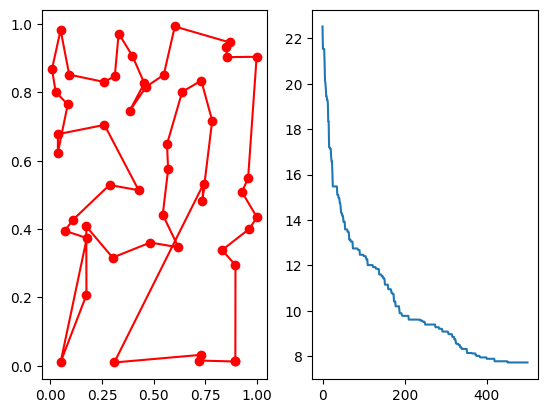

In [6]:
fig, ax = plt.subplots(1, 2)
best_points_ = np.concatenate([best_points, [best_points[0]]])
best_points_coordinate = points_coordinate[best_points_, :]
ax[0].plot(best_points_coordinate[:, 0], best_points_coordinate[:, 1], 'o-r')
ax[1].plot(ga_tsp.generation_best_Y)
plt.show()